Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive

drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [21]:
root_path = 'gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/'
# /content/gdrive/MyDrive/Upgrad_deeplearning_Assignment

In [22]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(root_path+"Train")
data_dir_test = pathlib.Path(root_path+'Test')


In [23]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [24]:
batch_size = 32
img_height = 180
img_width = 180

In [25]:
print(tf.__version__)

2.8.2


Use 80% of the images for training, and 20% for validation.

In [26]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [27]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [31]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

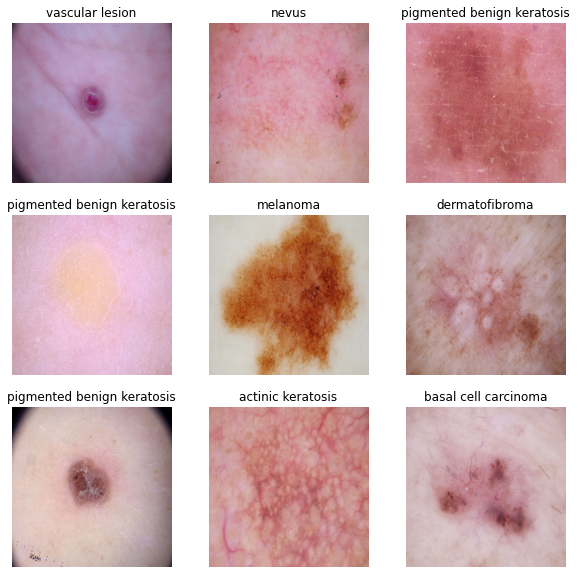

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

## **Model M1**

In [ ]:
### Your code goes here

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 41, 41, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 16s 74ms/step - loss: 2.0251 - accuracy: 0.2612 - val_loss: 1.7907 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.6318 - accuracy: 0.4180 - val_loss: 1.5752 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4928 - accuracy: 0.4788 - val_loss: 1.4409 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3694 - accuracy: 0.5167 - val_loss: 1.3497 - val_accuracy: 0.5436
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3058 - accuracy: 0.5419 - val_loss: 1.3297 - val_accuracy: 0.5526
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2103 - accuracy: 0.5698 - val_loss: 1.3292 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1827 - accuracy: 0.5742 - val_loss: 1.3180 - val_accuracy: 0.5414
Epoch 8/20
5

### Visualizing training results

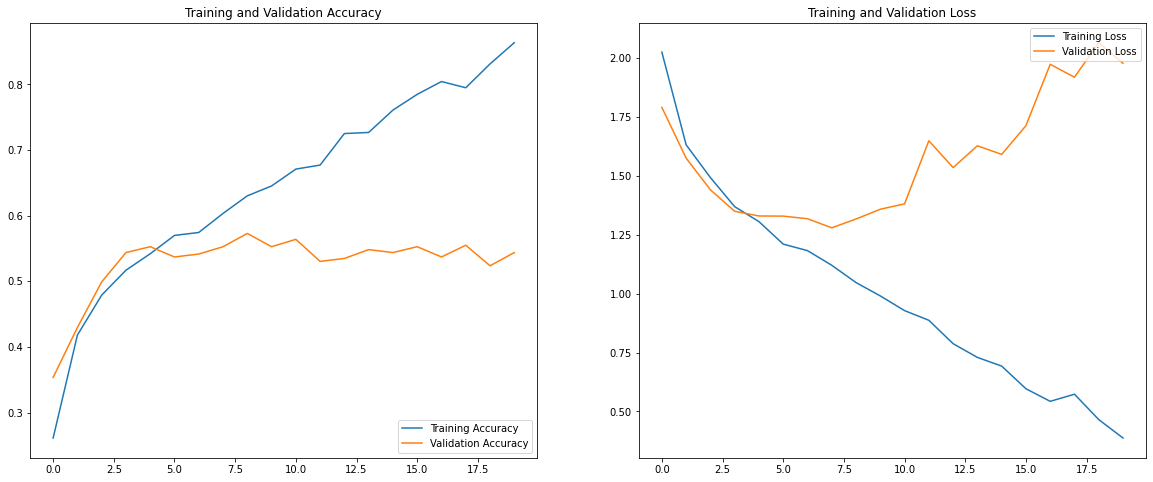

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

From the above two graphs we can clearly observe that our model is **over fitting** since as you increase the epoches we can see the training accuracy is increasing but validation accuracy is staying down.

**Data Augmentation**

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

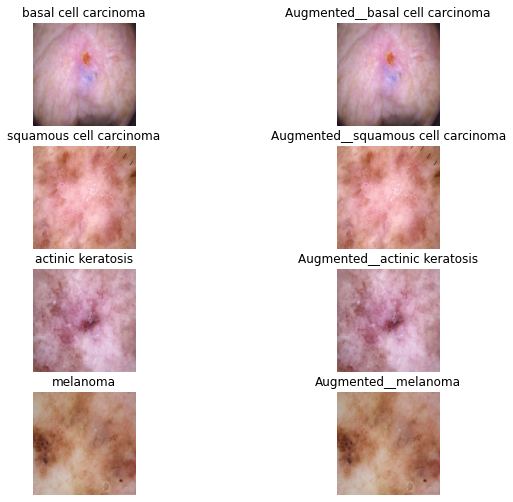

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 20))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(9, 2, 2*i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    ax = plt.subplot(9, 2, 2*i+2)
    plt.imshow(data_augmentation(images[i]).numpy().astype("uint8"))
    plt.title("Augmented__"+class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model
#### **Model M2**

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
  data_augmentation, # New Data Augmentation  Layer
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2), # New Droupout layer
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2), # New Droupout layer
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2), # New Droupout layer
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2), # New Droupout layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_10 (Sequential)  (180, 180, 3)             0         
                                                                 
 conv2d_28 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 89, 89, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 87, 87, 32)        4640      
                                                     

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - ETA: 0s - loss: 2.0594 - accuracy: 0.1903

56/56 [==============================] - 3s 30ms/step - loss: 2.0594 - accuracy: 0.1903 - val_loss: 2.1288 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 2.0313 - accuracy: 0.2009 - val_loss: 2.0757 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 2.0025 - accuracy: 0.2227 - val_loss: 2.0769 - val_accuracy: 0.2192
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9836 - accuracy: 0.2450 - val_loss: 1.9435 - val_accuracy: 0.2685
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9058 - accuracy: 0.2768 - val_loss: 1.8500 - val_accuracy: 0.3065
Epoch 6/20
56/56 [==============================] - 1s 27ms/step - loss: 1.8374 - accuracy: 0.3064 - val_loss: 1.8478 - val_accuracy: 0.3289
Epoch 7/20
56/56 [==============================] - 1s 27ms/step - loss: 1.7653 - accuracy: 0.3499 - val_loss: 1.6843 - val_accuracy: 0.3557
Epoch 8/20
56/56 [======

### Visualizing the results

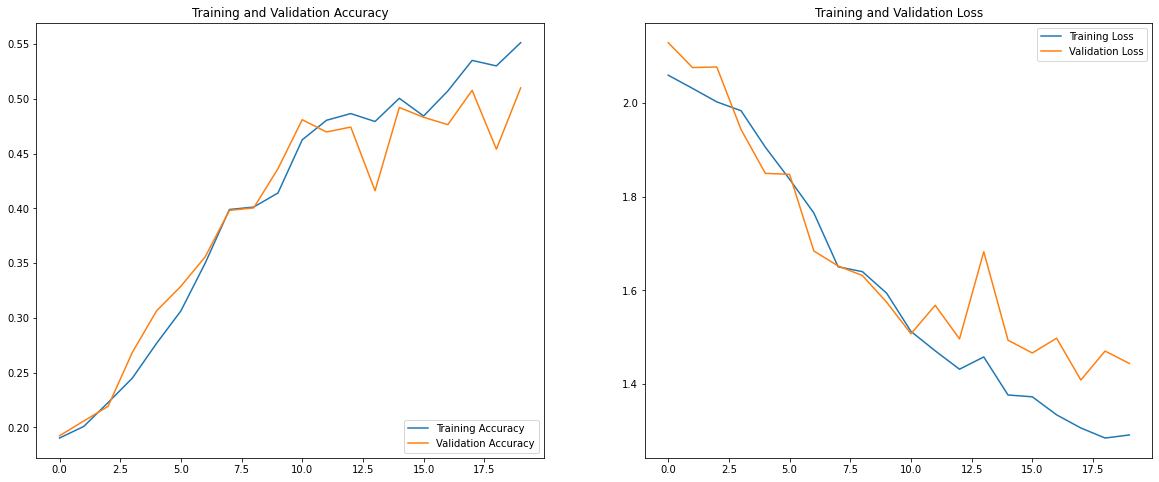

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

We can see now we removed Overfitting because training and validation accuracy is nearly same across all the epoches but main problem is accuracy is not good , so we will now deal with one common problem named class imabalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
str(data_dir_train)

'gdrive/Othercomputers/My Laptop (1)/Upgrad DS/Deep Learning/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [ ]:
## Your code goes here.
path_list = [str(x).replace(str(data_dir_train)+"/","").split("/")[0] for x in data_dir_train.glob('*/*.jpg')]


In [ ]:
from collections import Counter
count_data = dict(Counter(path_list))
count_data

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

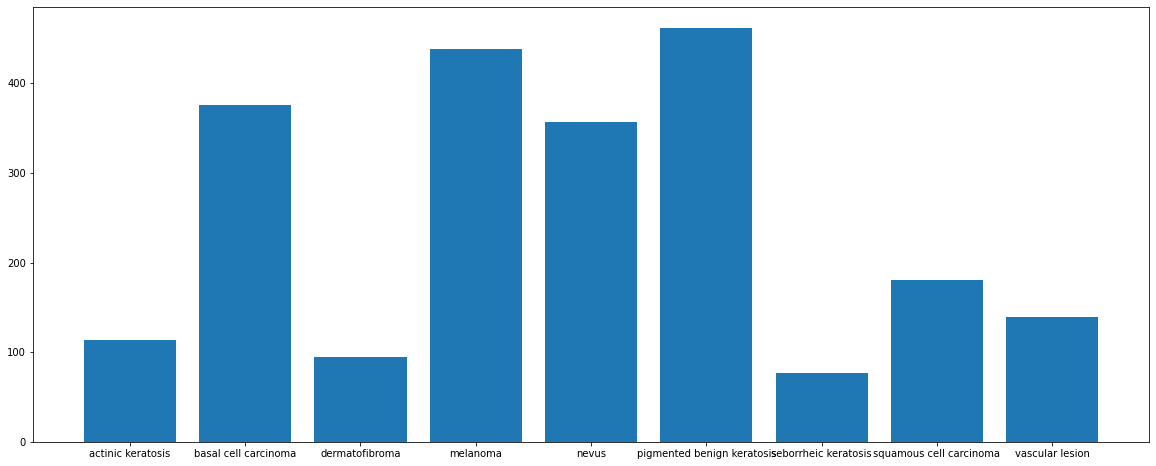

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(range(len(count_data)), list(count_data.values()), tick_label=list(count_data.keys()))

plt.show()

In [33]:
path_list = [x for x in data_dir_train.glob(os.path.join('*', '*.jpg'))]
path_list[:5]

[PosixPath('gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024923.jpg'),
 PosixPath('gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024946.jpg'),
 PosixPath('gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024710.jpg'),
 PosixPath('gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024925.jpg'),
 PosixPath('gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025029.jpg')]

In [34]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob(os.path.join( '*','*.jpg'))]
lesion_list[:5]

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma']

In [35]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [36]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df.head(5)

,Path,Label
0,gdrive/MyDrive/Upgrad_deeplearning_Assignment/...,squamous cell carcinoma
1,gdrive/MyDrive/Upgrad_deeplearning_Assignment/...,squamous cell carcinoma
2,gdrive/MyDrive/Upgrad_deeplearning_Assignment/...,squamous cell carcinoma
3,gdrive/MyDrive/Upgrad_deeplearning_Assignment/...,squamous cell carcinoma
4,gdrive/MyDrive/Upgrad_deeplearning_Assignment/...,squamous cell carcinoma


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - From the Graph we can clearly seee that the **seborrheic keratosis** class is having the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
#### - **pigmented benign keratosis,melanoma,nevus,basal cell carcinoma** classes dominates the data in terms proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path(path_to_training_dataset +"/"+ i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF2E0058410>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2F29E5D50>: 100%|██████████| 500/500 [00:19<00:00, 26.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2E0082110>: 100%|██████████| 500/500 [00:18<00:00, 26.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF2F2767F90>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1011x713 at 0x7FF2E0082290>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2F3843F50>: 100%|██████████| 500/500 [00:18<00:00, 26.83 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF2F2A43650>: 100%|██████████| 500/500 [00:41<00:00, 12.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF2E00D8C90>: 100%|██████████| 500/500 [00:19<00:00, 26.28 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad_deeplearning_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2E0160AD0>: 100%|██████████| 500/500 [00:18<00:00, 26.86 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
path_list_new = [x for x in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]
#path_list_new

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]
lesion_list_new[:5]

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma']

In [40]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [41]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [42]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)
## **Model M3**

In [46]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2), # New Droupout layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

#### **Todo:**  Train your model

In [48]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 43s 180ms/step - loss: 1.9315 - accuracy: 0.2437 - val_loss: 1.7055 - val_accuracy: 0.3808
Epoch 2/50
169/169 [==============================] - 32s 182ms/step - loss: 1.6021 - accuracy: 0.3930 - val_loss: 1.4647 - val_accuracy: 0.4195
Epoch 3/50
169/169 [==============================] - 32s 182ms/step - loss: 1.4456 - accuracy: 0.4436 - val_loss: 1.3518 - val_accuracy: 0.4536
Epoch 4/50
169/169 [==============================] - 32s 186ms/step - loss: 1.3441 - accuracy: 0.4794 - val_loss: 1.2965 - val_accuracy: 0.4967
Epoch 5/50
169/169 [==============================] - 31s 176ms/step - loss: 1.2046 - accuracy: 0.5345 - val_loss: 1.2183 - val_accuracy: 0.5152
Epoch 6/50
169/169 [==============================] - 31s 178ms/step - loss: 1.1421 - accuracy: 0.5695 - val_loss: 1.0637 - val_accuracy: 0.5768
Epoch 7/50
169/169 [==============================] - 31s 179ms/step - loss: 1.0171 - accuracy: 0.6196 - val_loss: 1.0241 - val_ac

#### **Todo:**  Visualize the model results

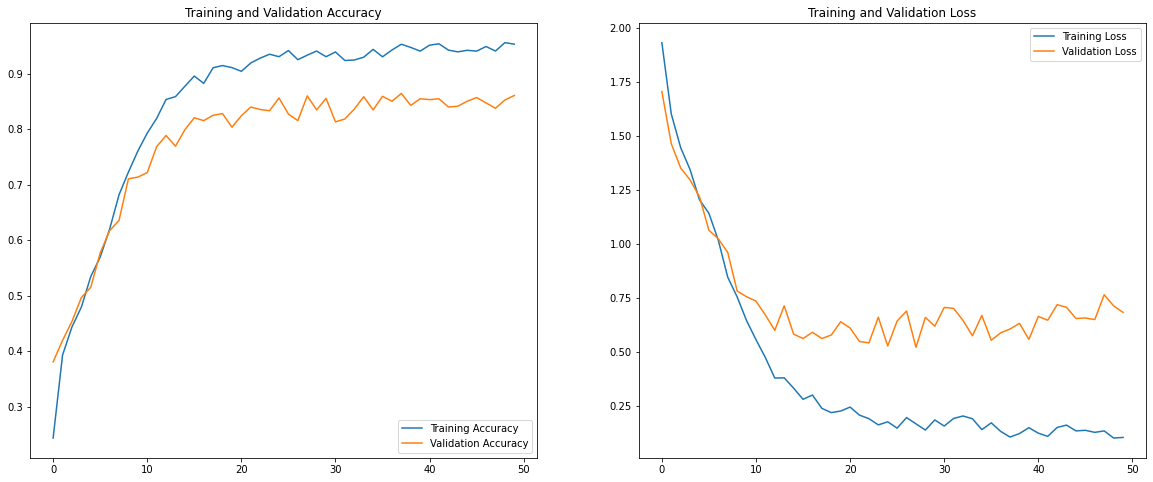

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
#### Ans : Class rebalance helped so much that our accuracy is increased from 60 to 80 using the class rebalance technique . From above graph we can also observe that at 20 epoches our model is stabilized, beyong 20 epoches our model is overfitting.

